In [10]:
import matplotlib.pyplot as plt
from bitarray import bitarray
from PIL import ImageOps
from PIL import Image
import numpy as np

In [2]:
# Open the image file
test_image_RGB = Image.open("TestImage_RGB.png")
print(np.array(test_image_RGB))

[[[ 49 124 189]
  [ 49 124 189]
  [ 49 124 189]
  ...
  [126 164 209]
  [135 173 218]
  [135 173 218]]

 [[ 49 124 189]
  [ 49 124 189]
  [ 49 124 189]
  ...
  [131 170 213]
  [134 172 217]
  [134 173 216]]

 [[ 48 122 187]
  [ 48 122 187]
  [ 48 122 187]
  ...
  [128 165 207]
  [131 168 212]
  [131 168 210]]

 ...

 [[ 24  84  48]
  [  9  69  33]
  [ 10  72  35]
  ...
  [216 155   4]
  [220 159   8]
  [220 159   8]]

 [[ 30  89  59]
  [ 11  72  41]
  [  8  69  38]
  ...
  [219 158   7]
  [234 170  21]
  [234 170  21]]

 [[ 37  95  70]
  [ 15  75  49]
  [  8  68  42]
  ...
  [221 161  13]
  [234 172  27]
  [234 172  29]]]


In [3]:
# Convert the image in gray scale
test_image_G = test_image_RGB.convert('L')
# Resize the image in 8x8 pixels
test_image_G = test_image_G.resize((256,256))
# Save the image
test_image_G.save("TestImage_G.png")
print(np.array(test_image_G))

[[109 109 109 ... 160 160 167]
 [108 108 108 ... 163 162 164]
 [107 107 107 ... 169 163 166]
 ...
 [ 57  54  56 ... 158 156 157]
 [ 57  49  49 ... 154 158 168]
 [ 64  47  44 ... 159 163 174]]


In [12]:
# Convert the image data to a numpy array
image_array = np.array(test_image_G)

# Normalize the pixel values to the range [0, 255]
normalized_image = (image_array / 255.0) * 255

# Convert the pixel values to integers
integer_image = normalized_image.astype(np.uint8)

# Flatten the image into a 1D array
flattened_image = integer_image.flatten()

# Create a bitarray for the binary representation of the image data
binary_data = bitarray()
for pixel in flattened_image:
    binary_data.frombytes(bytes([pixel]))
    
# Define the memory width and depth
memory_width = 8  # 8 bits per memory location
memory_depth = len(binary_data) // memory_width  # Number of memory locations

# Create the .mif file
with open('image.mif', 'w') as f:
    f.write('DEPTH = {};\n'.format(memory_depth))
    f.write('WIDTH = {};\n'.format(memory_width))
    f.write('ADDRESS_RADIX = DEC;\n')
    f.write('DATA_RADIX = BIN;\n')
    f.write('CONTENT\n')
    f.write('BEGIN\n')

    address = 0
    for i in range(0, len(binary_data), memory_width):
        data = binary_data[i:i+memory_width]
        f.write('{}: {};\n'.format(address, data.to01()))
        address += 1

    f.write('END;\n')

In [4]:
def histogram_equalization(image):
    # Calculate histogram
    histogram = [0] * 256
    for row in image:
        for pixel in row:
            histogram[pixel] += 1

    # Calculate cumulative distribution function (CDF)
    cdf = [0] * 256
    cdf[0] = histogram[0]
    for i in range(1, 256):
        cdf[i] = cdf[i-1] + histogram[i]

    # Calculate equalized histogram
    equalized_histogram = [0] * 256
    for i in range(256):
        equalized_histogram[i] = round((cdf[i] - cdf[0]) / ((image.shape[0] * image.shape[1]) - cdf[0]) * 255)

    # Apply equalization to image
    equalized_image = []
    for row in image:
        equalized_row = []
        for pixel in row:
            equalized_pixel = equalized_histogram[pixel]
            equalized_row.append(equalized_pixel)
        equalized_image.append(equalized_row)

    return equalized_image

In [5]:
def visualize_image(image):
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

In [8]:
newImage_G = histogram_equalization(np.array(test_image_G))
print(newImage_G)

[[69, 69, 69, 69, 67, 69, 71, 71, 72, 71, 78, 88, 96, 129, 129, 127, 126, 127, 129, 129, 129, 129, 132, 136, 129, 124, 132, 145, 156, 158, 152, 141, 132, 132, 143, 158, 158, 160, 162, 162, 158, 150, 143, 138, 148, 148, 134, 117, 106, 112, 114, 117, 124, 120, 116, 114, 100, 88, 58, 43, 54, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 54, 52, 52, 52, 39, 61, 114, 141, 143, 158, 145, 167, 165, 164, 152, 141, 143, 148, 145, 145, 145, 145, 154, 158, 158, 150, 154, 162, 167, 169, 169, 171, 171, 171, 171, 171, 171, 171, 171, 174, 174, 174, 176, 176, 176, 174, 172, 174, 176, 165, 167, 162, 158, 165, 172, 207, 223, 222, 222, 223, 223, 221, 221, 222, 222, 224, 230, 236, 234, 234, 236, 236, 234, 233, 234, 233, 234, 233, 229, 229, 231, 232, 233, 229, 222, 224, 224, 222, 236, 241, 238, 241, 

In [9]:
print(len(newImage_G))
print(len(newImage_G[0]))

256
256


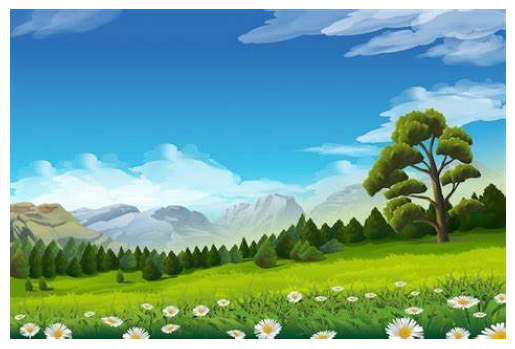

In [9]:
visualize_image(test_image_RGB)

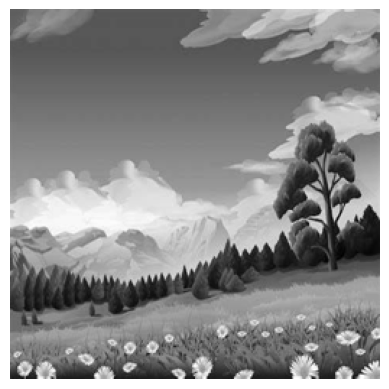

In [7]:
visualize_image(test_image_G)

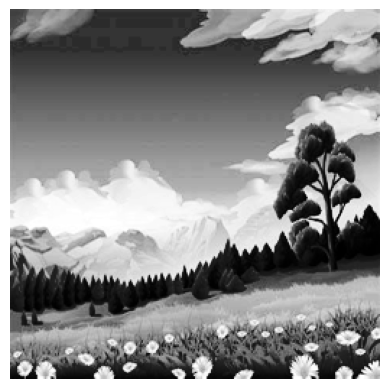

In [8]:
visualize_image(newImage_G)